In [ ]:
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))

In [ ]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [ ]:
#peek at data
df.sample(5)

Time        V1        V2  ...       V28  Amount  Class
71520    54328.0  1.045027 -1.264656  ...  0.035656  127.47      0
31158    36239.0  0.857725 -0.504731  ...  0.038395  214.94      0
561        421.0  1.166913 -0.023367  ...  0.004149   10.69      0
34742    37804.0  1.089271 -0.086757  ...  0.023121    9.99      0
213262  139181.0  2.007511 -0.163731  ... -0.076564   26.53      0

[5 rows x 31 columns]

In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

Time      Amount
count  284807.000  284807.000
mean    94813.860      88.350
std     47488.146     250.120
min         0.000       0.000
25%     54201.500       5.600
50%     84692.000      22.000
75%    139320.500      77.165
max    172792.000   25691.160

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


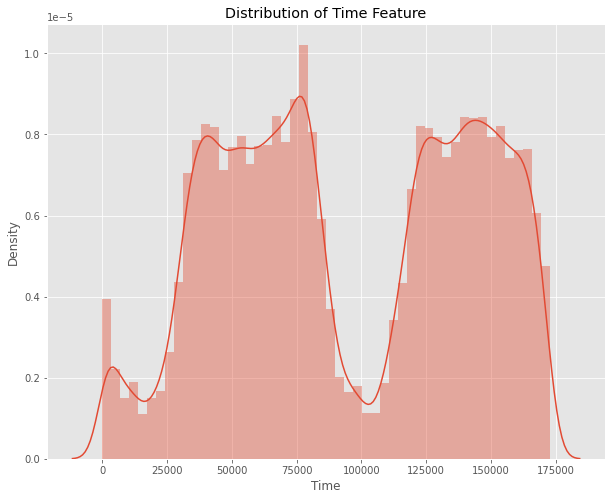

In [ ]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


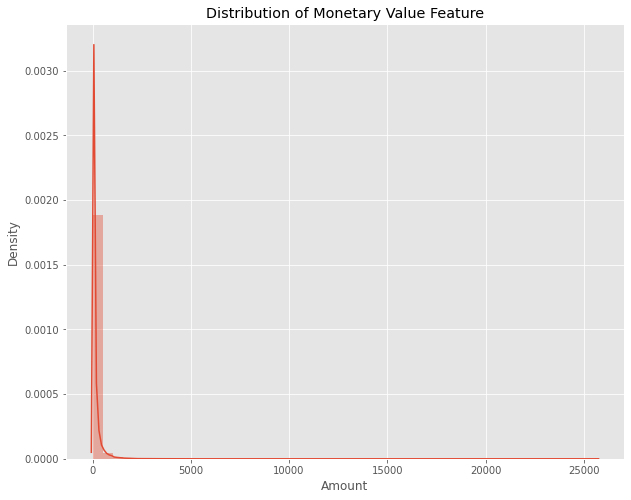

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

In [ ]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

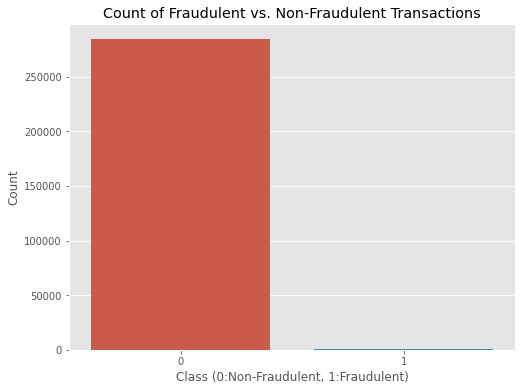

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [ ]:
corr = df.corr()
corr

Time         V1         V2  ...        V28     Amount      Class
Time    1.000  1.174e-01 -1.059e-02  ... -9.413e-03 -1.060e-02 -1.232e-02
V1      0.117  1.000e+00  4.697e-17  ...  9.821e-16 -2.277e-01 -1.013e-01
V2     -0.011  4.697e-17  1.000e+00  ... -3.676e-16 -5.314e-01  9.129e-02
V3     -0.420 -1.424e-15  2.512e-16  ...  7.727e-16 -2.109e-01 -1.930e-01
V4     -0.105  1.755e-17 -1.126e-16  ... -5.864e-17  9.873e-02  1.334e-01
V5      0.173  6.391e-17 -2.040e-16  ... -3.299e-16 -3.864e-01 -9.497e-02
V6     -0.063  2.398e-16  5.025e-16  ...  4.813e-16  2.160e-01 -4.364e-02
V7      0.085  1.992e-15  3.966e-16  ... -6.837e-17  3.973e-01 -1.873e-01
V8     -0.037 -9.491e-17 -4.414e-17  ... -4.484e-16 -1.031e-01  1.988e-02
V9     -0.009  2.170e-16 -5.729e-17  ...  9.147e-16 -4.425e-02 -9.773e-02
V10     0.031  7.434e-17 -4.782e-16  ... -1.516e-16 -1.015e-01 -2.169e-01
V11    -0.248  2.439e-16  9.469e-16  ... -3.092e-16  1.040e-04  1.549e-01
V12     0.124  2.422e-16 -6.588e-16  ...  7.327e-16 -9.542e-03 -2.606e-01
V13    -0.066 -2.115e-16  3.855e-16  ...  1.050e-15  5.293e-03 -4.570e-03
V14    -0.099  9.353e-16 -2.541e-16  ...  2.503e-15  3.375e-02 -3.025e-01
V15    -0.183 -3.252e-16  2.831e-16  ... -1.063e-15 -2.986e-03 -4.223e-03
V16     0.012  6.309e-16  4.934e-17  ...  8.637e-16 -3.910e-03 -1.965e-01
V17    -0.073 -5.012e-16 -9.883e-16  ... -2.183e-16  7.309e-03 -3.265e-01
V18     0.090  2.870e-16  2.637e-16  ...  8.845e-16  3.565e-02 -1.115e-01
V19     0.029  1.818e-16  9.528e-17  ... -1.376e-15 -5.615e-02  3.478e-02
V20    -0.051  1.037e-16 -9.310e-16  ... -1.134e-16  3.394e-01  2.009e-02
V21     0.045 -1.755e-16  8.444e-17  ...  5.132e-16  1.060e-01  4.041e-02
V22     0.144  7.477e-17  2.501e-16  ... -3.021e-16 -6.480e-02  8.053e-04
V23     0.051  9.809e-16  1.060e-16  ...  9.030e-16 -1.126e-01 -2.685e-03
V24    -0.016  7.354e-17 -8.142e-18  ... -2.259e-16  5.146e-03 -7.221e-03
V25    -0.233 -9.805e-16 -4.262e-17  ...  3.399e-16 -4.784e-02  3.308e-03
V26    -0.041 -8.622e-17  2.602e-16  ... -3.751e-16 -3.208e-03  4.455e-03
V27    -0.005  3.208e-17 -4.478e-16  ... -3.770e-16  2.883e-02  1.758e-02
V28    -0.009  9.821e-16 -3.676e-16  ...  1.000e+00  1.026e-02  9.536e-03
Amount -0.011 -2.277e-01 -5.314e-01  ...  1.026e-02  1.000e+00  5.632e-03
Class  -0.012 -1.013e-01  9.129e-02  ...  9.536e-03  5.632e-03  1.000e+00

[31 rows x 31 columns]

Text(0.5, 1.0, 'Heatmap of Correlation')

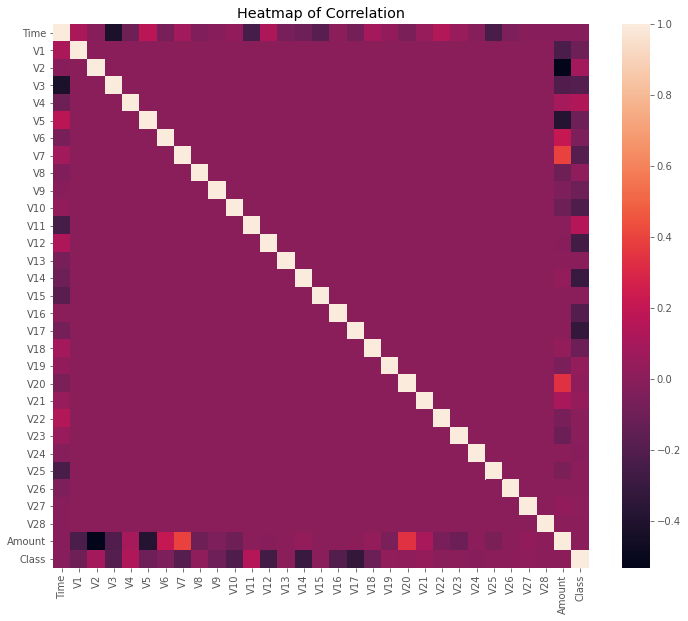

In [ ]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [ ]:
#skewness
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [ ]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [ ]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

Time     V1     V2  ...  Class  scaled_amount  scaled_time
10734    18202.0 -1.903  1.275  ...      0         -0.353       -1.613
128767   78832.0  1.218  0.026  ...      0         -0.073       -0.337
225257  144172.0 -2.037  2.001  ...      0         -0.349        1.039
119668   75537.0 -0.308  1.004  ...      0         -0.345       -0.406
17768    28899.0  1.209 -0.916  ...      0         -0.133       -1.388

[5 rows x 33 columns]

In [ ]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [ ]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256301, 31)
Test Shape: (28506, 31)


In [ ]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [ ]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 453 fraudulent transactions in the train data.


In [ ]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [ ]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

V1     V2     V3     V4  ...    V28  Class  scaled_amount  scaled_time
236125 -0.207  1.016  0.203 -0.634  ...  0.097      0         -0.335        1.383
216219 -1.160  0.394 -0.527 -0.618  ... -0.021      0          0.140        1.173
30940  -1.357  0.672  1.642  0.443  ... -0.082      0         -0.146       -1.204
56278  -0.482 -0.414  0.909 -2.681  ... -0.029      0          0.234       -0.937
48718  -0.404  0.366  0.803 -0.897  ...  0.150      0         -0.221       -1.021

[5 rows x 31 columns]

In [ ]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [ ]:
subsample = pd.concat([selected, fraud])
len(subsample)

906

In [ ]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

V1     V2      V3     V4  ...    V28  Class  scaled_amount  scaled_time
0 -0.227  0.258  -1.152 -0.433  ...  0.292      0          0.435        0.581
1 -5.552  5.678  -9.776  8.416  ... -0.946      1          0.126        0.166
2  1.522 -0.519  -2.582  0.775  ...  0.042      1          0.751        0.737
3 -3.706  4.108  -3.804  1.710  ... -0.097      1         -0.349        0.040
4  1.125  1.130  -0.963  2.676  ...  0.064      1         -0.338       -1.461
5 -0.090  0.602   0.147 -0.747  ...  0.082      0         -0.346        1.273
6 -3.891  7.099 -11.426  8.608  ...  0.875      1         -0.349       -1.752
7 -5.933  4.572  -9.427  6.577  ...  0.371      1         -0.332       -1.130
8  1.133  0.220   0.608  1.057  ...  0.026      0         -0.209       -0.279
9 -1.309  1.786  -1.371  1.214  ...  0.293      1         -0.349       -1.027

[10 rows x 31 columns]

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

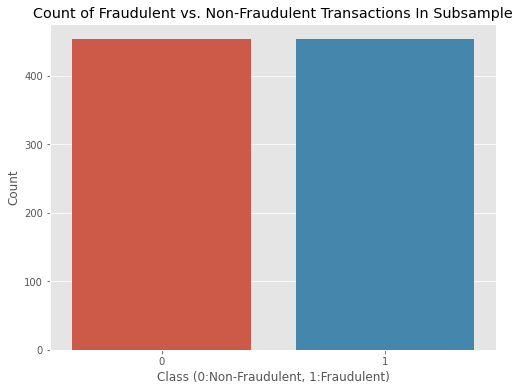

In [ ]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [ ]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

Class
V1            -4.240e-01
V2             5.066e-01
V3            -5.694e-01
V4             7.166e-01
V5            -3.810e-01
V6            -4.043e-01
V7            -4.755e-01
V8             5.459e-02
V9            -5.661e-01
V10           -6.274e-01
V11            6.955e-01
V12           -6.876e-01
V13           -7.470e-02
V14           -7.534e-01
V15           -4.384e-02
V16           -5.956e-01
V17           -5.603e-01
V18           -4.619e-01
V19            2.471e-01
V20            1.968e-01
V21            1.323e-01
V22           -8.529e-04
V23           -1.194e-02
V24           -7.339e-02
V25            1.419e-02
V26            6.617e-02
V27            1.015e-01
V28            4.649e-02
Class          1.000e+00
scaled_amount  1.031e-01
scaled_time   -1.662e-01

In [ ]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

Class
V3  -0.569
V9  -0.566
V10 -0.627
V12 -0.688
V14 -0.753
V16 -0.596
V17 -0.560

In [ ]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

Class
V2     0.507
V4     0.717
V11    0.695
Class  1.000

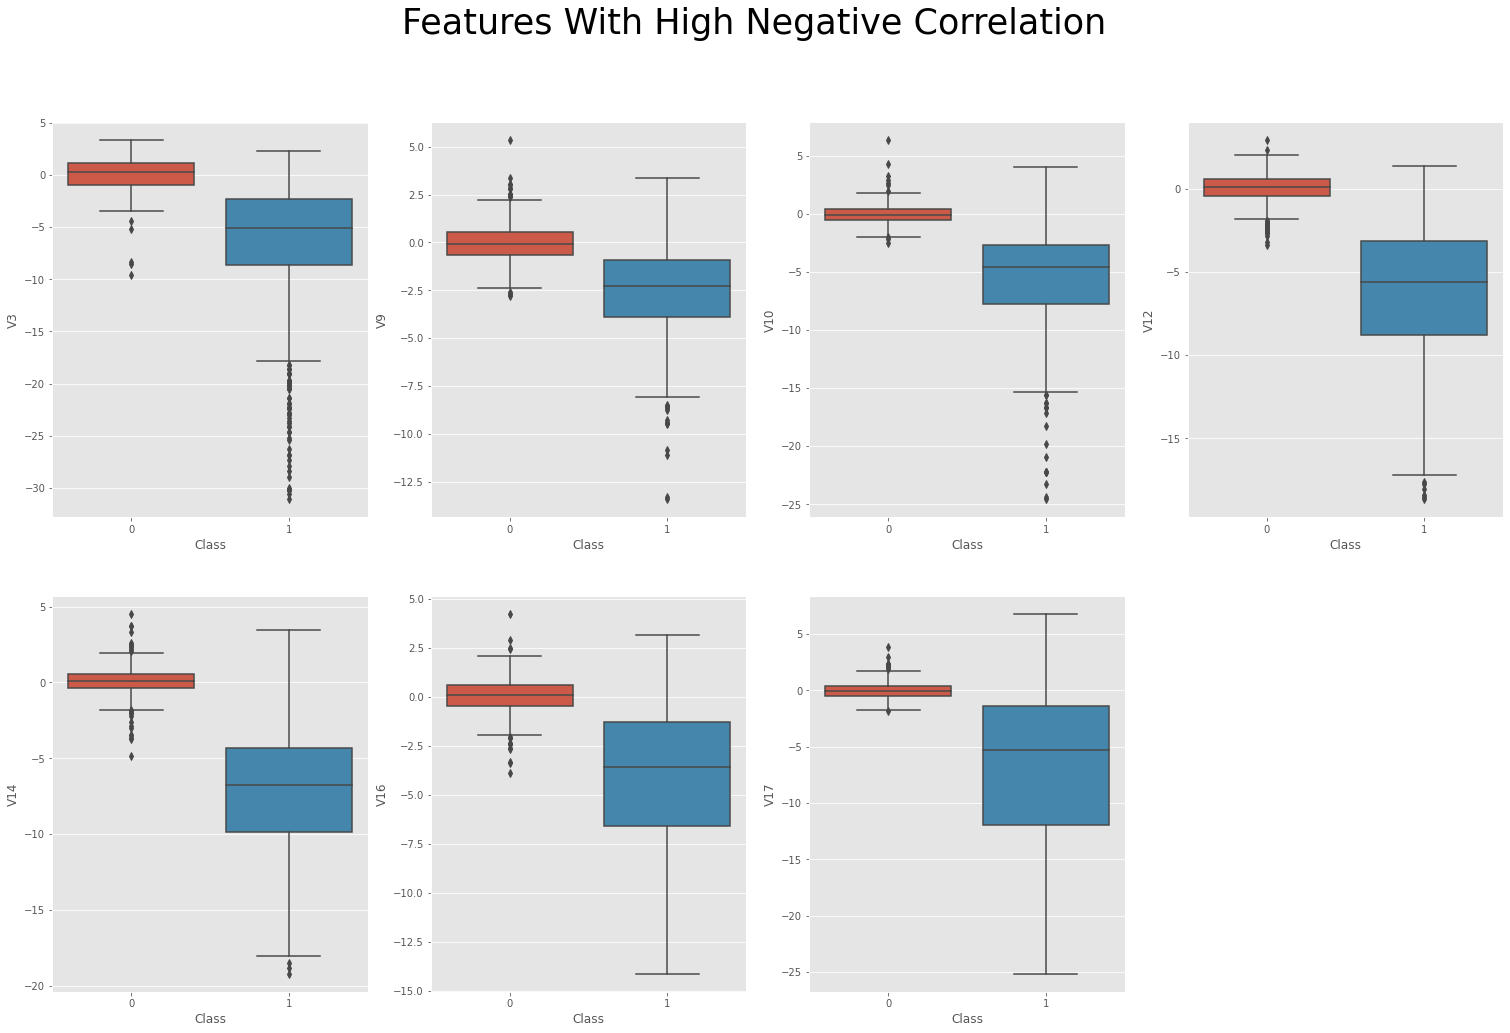

In [ ]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

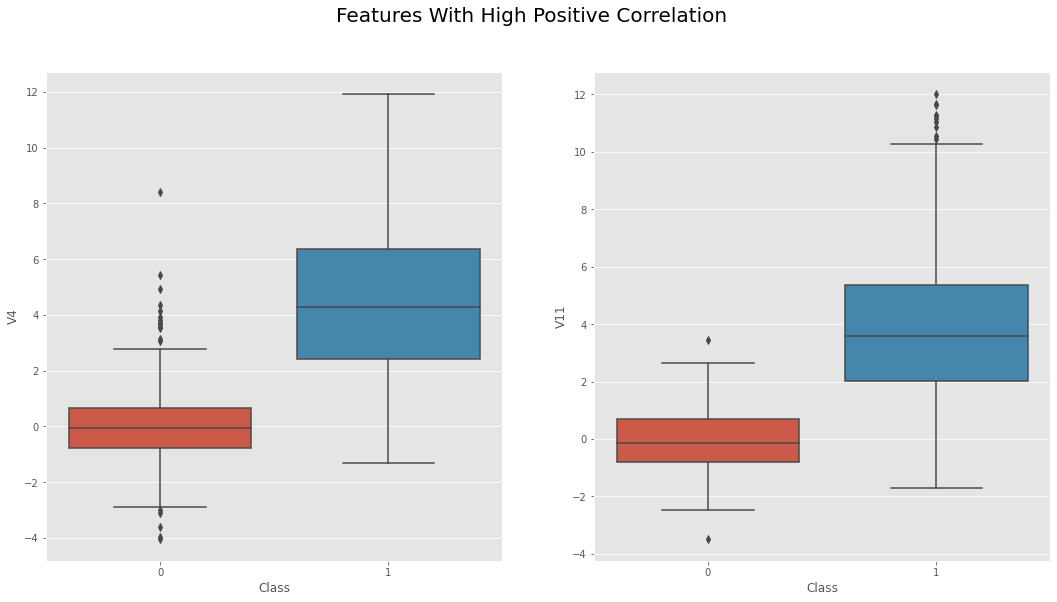

In [ ]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

In [ ]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [ ]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 906 transactions by 262 transactions to 644 transactions.


In [ ]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [ ]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

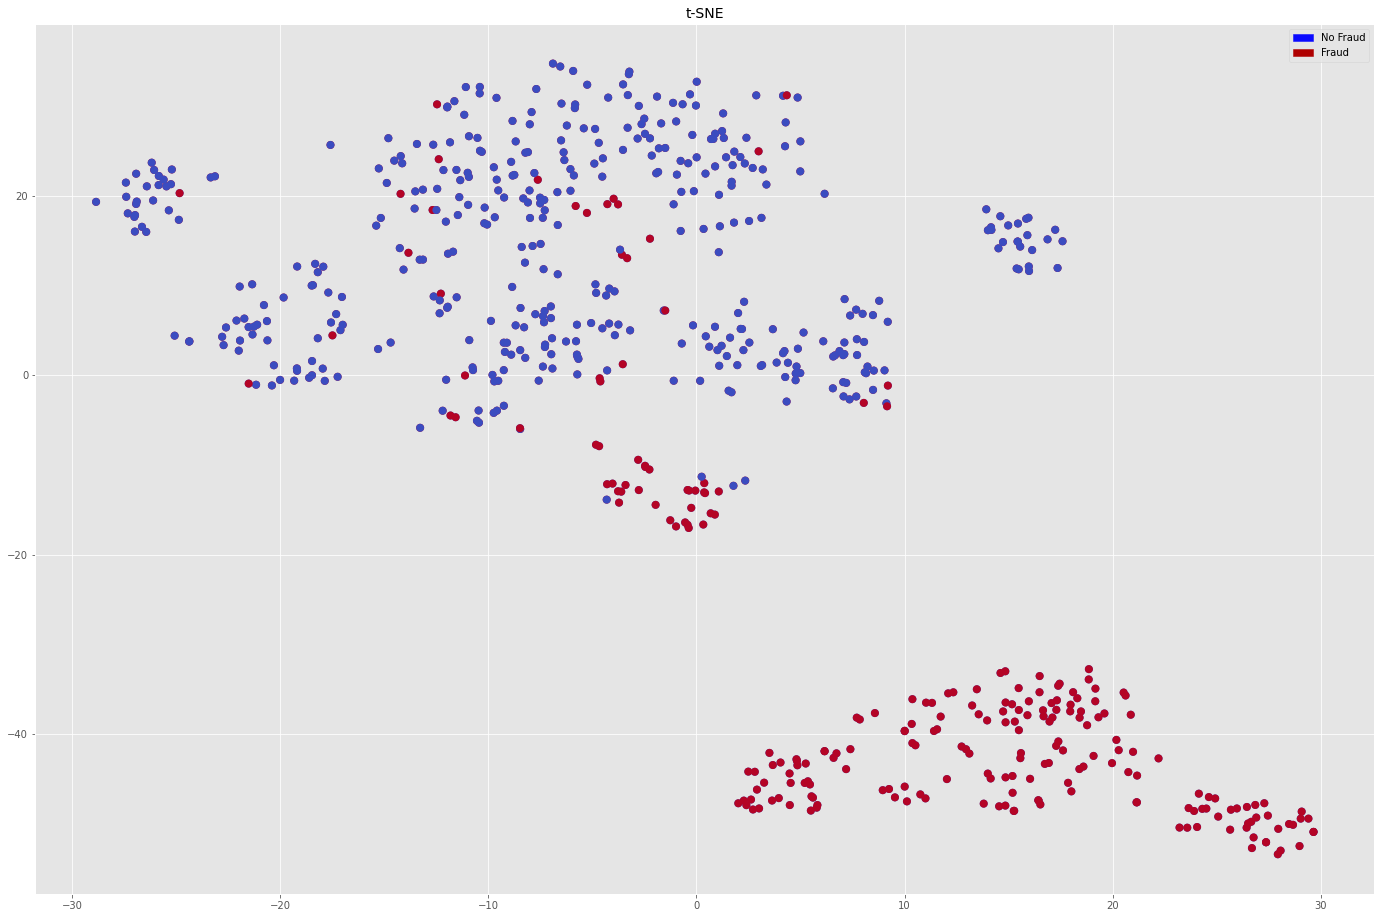

In [ ]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [ ]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (515, 30) (129, 30) 

Y_shapes:
 Y_train: Y_validation:
 (515,) (129,)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.976150 (0.017375)
LDA: 0.977796 (0.023521)
KNN: 0.961659 (0.021059)
CART: 0.905469 (0.022509)
SVM: 0.980273 (0.017112)
XGB: 0.978339 (0.015732)
RF: 0.976929 (0.018612)


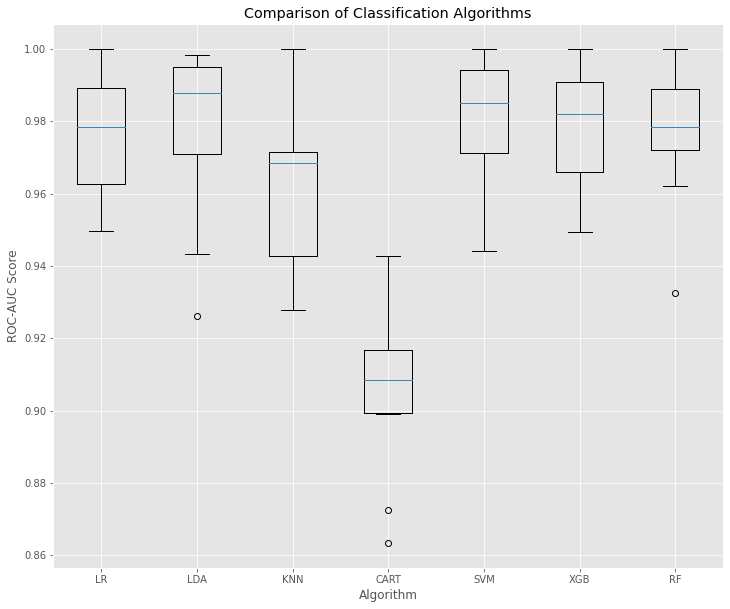

In [ ]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
y_pred=model.predict(X_validation)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_validation, y_pred))

Accuracy: 0.9224806201550387
